In [85]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.getcwd() + '/ML')

In [86]:
df= pd.read_csv(r"./PA-Truth.csv", sep=',')
df = df.drop_duplicates(subset=['iid'])
dfg= pd.read_csv(r"./PA-AgeGender-Predicted.csv", sep=',')
dfg = dfg.drop_duplicates(subset=['iid'])
main= pd.read_csv(r"./PA2.csv", sep=',')
main = main.drop_duplicates(subset=['iid'])

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (398,497,498,503,504,506,509,512,515,517,518,519,520,525,526,528,531,534,537,539,540,541,542,547,548,550,553,556,559,561,562,592,593,598,599,601,604,607,610,612,613,614,615,620,621,623,626,629,632,634,635,636,637,642,643,645,648,651,654,656,657,662,672,681,682,683,684,685,686,687,688,711,762) have mixed types.Specify dtype option on import or set low_memory=False.



In [87]:
df.shape

(3999, 32)

In [88]:
R1= df[['iid', 'A1', 'A2', 'A3', 'truth']]
R2= df[['iid', 'user.id']]

In [89]:
M=pd.merge(R2, R1, on='iid', how='inner')

In [90]:
M.shape

(3999, 6)

In [91]:
M2=pd.merge(M, dfg, on='user.id', how='inner')

In [92]:
M2=M2[['A1', 'A2', 'A3', 'truth']]

In [93]:
M2.head()

,A1,A2,A3,truth
0,3,4,4,2
1,1,4,4,1
2,1,1,4,1
3,3,3,3,3
4,1,1,1,1


-----------------------------------------------------------------------------------

In [94]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
from plotly.graph_objs import *

# for configuring connection 
import os

%matplotlib inline


import os


from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

#configure the notebook for use in offline mode
init_notebook_mode(connected=True)

In [95]:
df=M2
missing_values_count = df.isnull().sum()
missing_values_count

A1       0
A2       0
A3       0
truth    0
dtype: int64

In [96]:
df['A1']=df['A1'].astype("category")
df['A2']=df['A2'].astype("category")
df['A3']=df['A3'].astype("category")
df['truth']=df['truth'].astype("category")
df.head()

,A1,A2,A3,truth
0,3,4,4,2
1,1,4,4,1
2,1,1,4,1
3,3,3,3,3
4,1,1,1,1


In [97]:
df= df[df['truth']!=5]
df= df[df['A1']!=5]
df= df[df['A2']!=5]
df= df[df['A3']!=5]


In [98]:
df['truth'].unique()

[2, 1, 3, 4]
Categories (4, int64): [2, 1, 3, 4]

In [99]:
df['truth']=np.where(df['truth'] ==1, 'YY', df['truth'])
df['truth']=np.where(df['truth'] =='2', 'YN', df['truth'])
df['truth']=np.where(df['truth'] =='3', 'NY', df['truth'])
df['truth']=np.where(df['truth'] =='4', 'NN', df['truth'])

In [100]:
df = pd.get_dummies(df, prefix=['A1', 'A2', 'A3'], columns=['A1', 'A2', 'A3'], drop_first=False)
df.head()

,truth,A1_1,A1_2,A1_3,A1_4,A1_5,A2_1,A2_2,A2_3,A2_4,A2_5,A3_1,A3_2,A3_3,A3_4,A3_5
0,YN,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,YY,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,YY,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,NY,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,YY,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [101]:
import re
regex = re.compile(r"\[|\]|<|>", re.IGNORECASE)

df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in df.columns.values]
X=df.drop('truth', 1)
y=df['truth']
df_cols = list(X) 

In [102]:
df.columns

Index(['truth', 'A1_1', 'A1_2', 'A1_3', 'A1_4', 'A1_5', 'A2_1', 'A2_2', 'A2_3',
       'A2_4', 'A2_5', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5'],
      dtype='object')

In [103]:
df.isnull().values.sum()

0

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



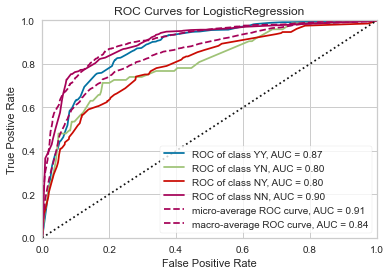

For fold 1:
Accuracy: 0.723540731237973
f-score: 0.723540731237973
                   pre       rec       spe        f1       geo       iba       sup

         NN       0.69      0.82      0.77      0.75      0.80      0.64       605
         NY       0.37      0.18      0.99      0.24      0.42      0.16        73
         YN       0.51      0.41      0.94      0.46      0.62      0.37       205
         YY       0.83      0.79      0.88      0.81      0.83      0.68       676

avg / total       0.71      0.72      0.85      0.71      0.77      0.60      1559



/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



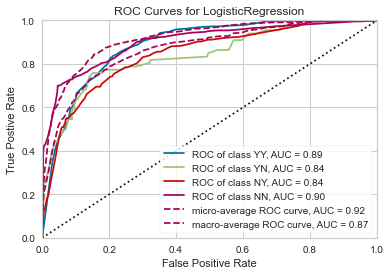

For fold 2:
Accuracy: 0.7323491655969191
f-score: 0.7323491655969191
                   pre       rec       spe        f1       geo       iba       sup

         NN       0.73      0.84      0.78      0.79      0.81      0.66       650
         NY       0.67      0.24      0.99      0.36      0.49      0.22        66
         YN       0.62      0.43      0.95      0.51      0.64      0.39       236
         YY       0.76      0.78      0.84      0.77      0.81      0.66       606

avg / total       0.72      0.73      0.84      0.72      0.77      0.60      1558



In [105]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
classes=['YY','YN','NY','NN', 'NC']


kf = KFold(n_splits=2)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train
    
    
    model = linear_model.LogisticRegression(C= 2.5,max_iter= 66,tol= 6.75e-05) 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof() 
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    f1=f1_score(y_test, y_pred, average='micro')
    print(f'f-score: {f1}')
    print(classification_report_imbalanced(y_test, y_pred))
       

---------------------------------------

## Random Forest

In [107]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['YY','YN','NY','NN', 'NC']


kf = KFold(n_splits=2)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train



    model = RandomForestClassifier(n_estimators=400, max_depth= 30, max_features=0.5, criterion='gini', min_samples_split=20) 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof("RF_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    f1=f1_score(y_test, y_pred, average='micro')
    print(f'f-score: {f1}')
    print(classification_report_imbalanced(y_test, y_pred))

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 1:
Accuracy: 0.7062219371391918
f-score: 0.7062219371391918
                   pre       rec       spe        f1       geo       iba       sup

         NN       0.67      0.79      0.76      0.73      0.77      0.60       605
         NY       0.44      0.15      0.99      0.22      0.39      0.14        73
         YN       0.50      0.40      0.94      0.45      0.62      0.36       205
         YY       0.80      0.78      0.85      0.79      0.82      0.66       676

avg / total       0.70      0.71      0.83      0.70      0.75      0.57      1559



/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 2:
Accuracy: 0.7130937098844673
f-score: 0.7130937098844673
                   pre       rec       spe        f1       geo       iba       sup

         NN       0.74      0.79      0.80      0.76      0.79      0.63       650
         NY       0.67      0.24      0.99      0.36      0.49      0.22        66
         YN       0.52      0.50      0.92      0.51      0.67      0.44       236
         YY       0.76      0.77      0.85      0.77      0.81      0.65       606

avg / total       0.71      0.71      0.84      0.71      0.77      0.59      1558



<Figure size 432x288 with 0 Axes>

In [108]:
df.columns

Index(['truth', 'A1_1', 'A1_2', 'A1_3', 'A1_4', 'A1_5', 'A2_1', 'A2_2', 'A2_3',
       'A2_4', 'A2_5', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5'],
      dtype='object')

------------------

## XGBoost

In [109]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['YY','YN','NY','NN', 'NC']


kf = KFold(n_splits=2)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train

    model = XGBClassifier(max_depth=8, gamma=0.063, colsample_bytree=0.71)
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof("XGB_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    f1=f1_score(y_test, y_pred, average='micro')
    print(f'f-score: {f1}')
    print(classification_report_imbalanced(y_test, y_pred))

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 1:
Accuracy: 0.7139191789608723
f-score: 0.7139191789608723
                   pre       rec       spe        f1       geo       iba       sup

         NN       0.69      0.82      0.76      0.75      0.79      0.63       605
         NY       0.39      0.15      0.99      0.22      0.39      0.14        73
         YN       0.46      0.42      0.92      0.44      0.63      0.37       205
         YY       0.84      0.76      0.89      0.80      0.82      0.67       676

avg / total       0.71      0.71      0.85      0.71      0.77      0.59      1559



/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 2:
Accuracy: 0.7150192554557124
f-score: 0.7150192554557124
                   pre       rec       spe        f1       geo       iba       sup

         NN       0.74      0.78      0.80      0.76      0.79      0.63       650
         NY       0.53      0.30      0.99      0.38      0.55      0.28        66
         YN       0.52      0.54      0.91      0.53      0.70      0.48       236
         YY       0.79      0.75      0.87      0.77      0.81      0.65       606

avg / total       0.71      0.72      0.85      0.71      0.77      0.60      1558



<Figure size 432x288 with 0 Axes>